In [1]:
import os
import ntpath
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
# Define data directories
straight_dir = '../straight_30_hz'
skidpad_dir = '../skidpad_30_hz'
fishhook_dir = '../fishhook_30_hz'
slalom_dir = '../slalom_30_hz'
all_dir = '../'

In [3]:
# Define function to shorten path names
def shorten_path(path):
    '''
    Function to view shortened paths.
    '''
    head,tail = ntpath.split(path)
    return tail

In [4]:
# Read the data
headers = ['timestamp','throttle','steering','leftTicks','rightTicks','posX','posY','posZ','roll','pitch','yaw','speed','angX','angY','angZ','accX','accY','accZ']

# Read each CSV file in dir "path/to/root_dir" and put the dataframes to a single dataframe
straight_logs = []
for file in Path(straight_dir).glob("**/V1 Log.csv"):
    straight_logs.append(pd.read_csv(file, names=headers))
straight_log = pd.concat(straight_logs)

skidpad_logs = []
for file in Path(skidpad_dir).glob("**/V1 Log.csv"):
    skidpad_logs.append(pd.read_csv(file, names=headers))
skidpad_log = pd.concat(skidpad_logs)

fishhook_logs = []
for file in Path(fishhook_dir).glob("**/V1 Log.csv"):
    fishhook_logs.append(pd.read_csv(file, names=headers))
fishhook_log = pd.concat(fishhook_logs)

slalom_logs = []
for file in Path(slalom_dir).glob("**/V1 Log.csv"):
    slalom_logs.append(pd.read_csv(file, names=headers))
slalom_log = pd.concat(slalom_logs)

all_logs = []
for file in Path(all_dir).glob("**/V1 Log.csv"):
    all_logs.append(pd.read_csv(file, names=headers))
all_log = pd.concat(all_logs)

# Preprocess the data
for log in [straight_log, skidpad_log, fishhook_log, slalom_log, all_log]:
    # Convert timestamp from string to datetime format
    log['timestamp'] = pd.to_datetime(log['timestamp'], format='%Y_%m_%d_%H_%M_%S_%f')

# View the first 5 entries in the dataframe
# straight_log.head()
# skidpad_log.head()
# fishhook_log.head()
# slalom_log.head()
# eight_log.head()
# all_log.head()

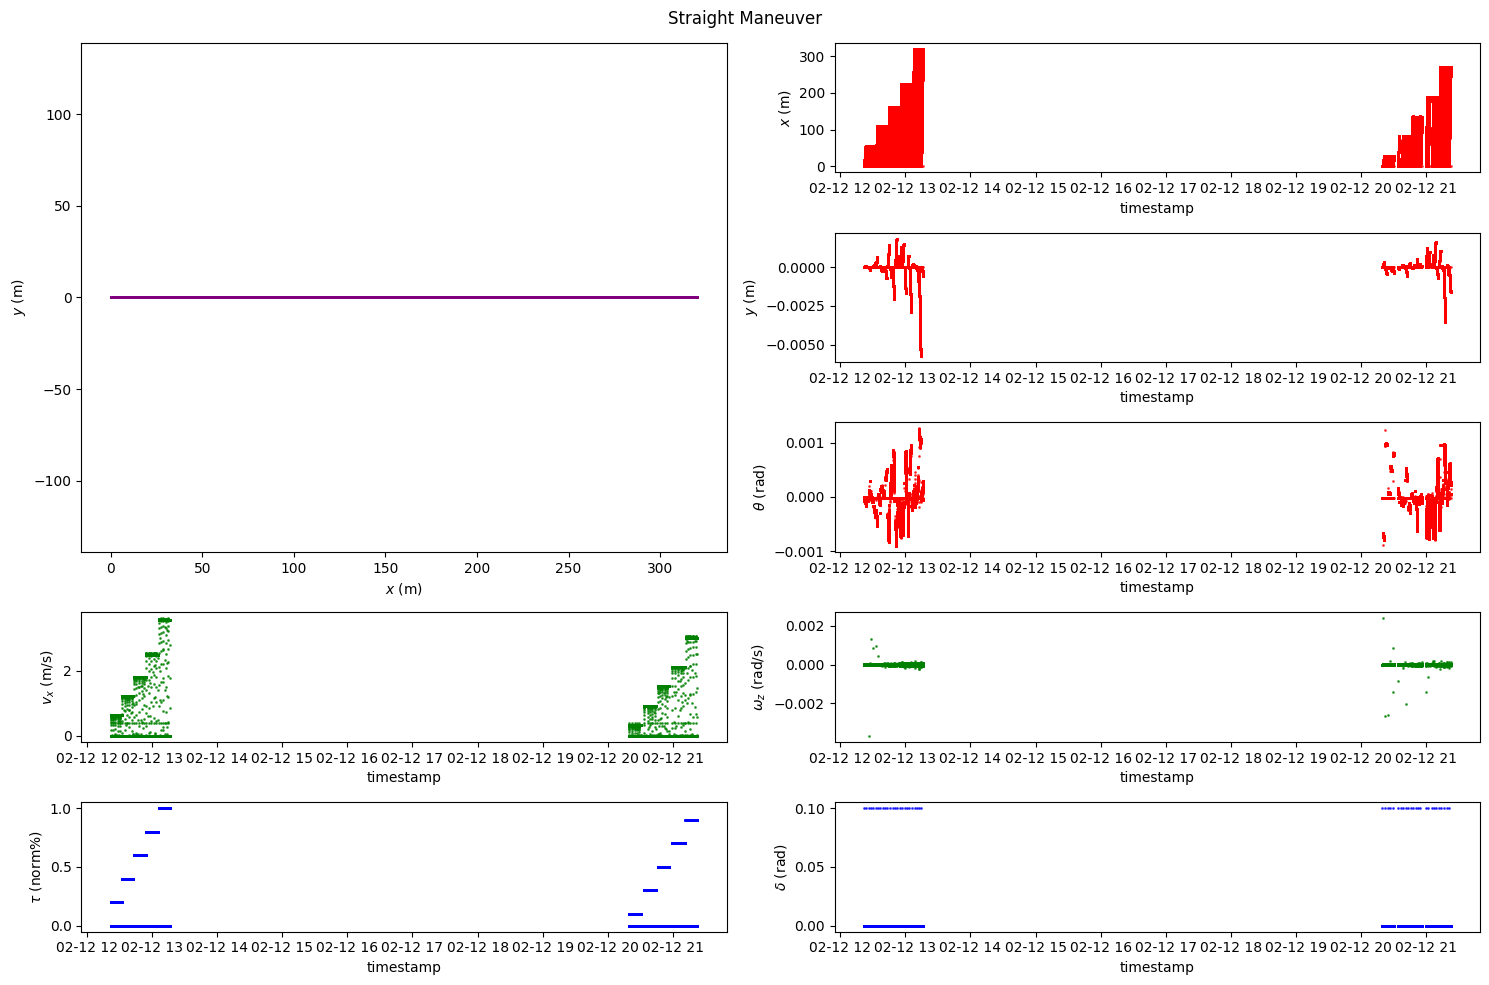

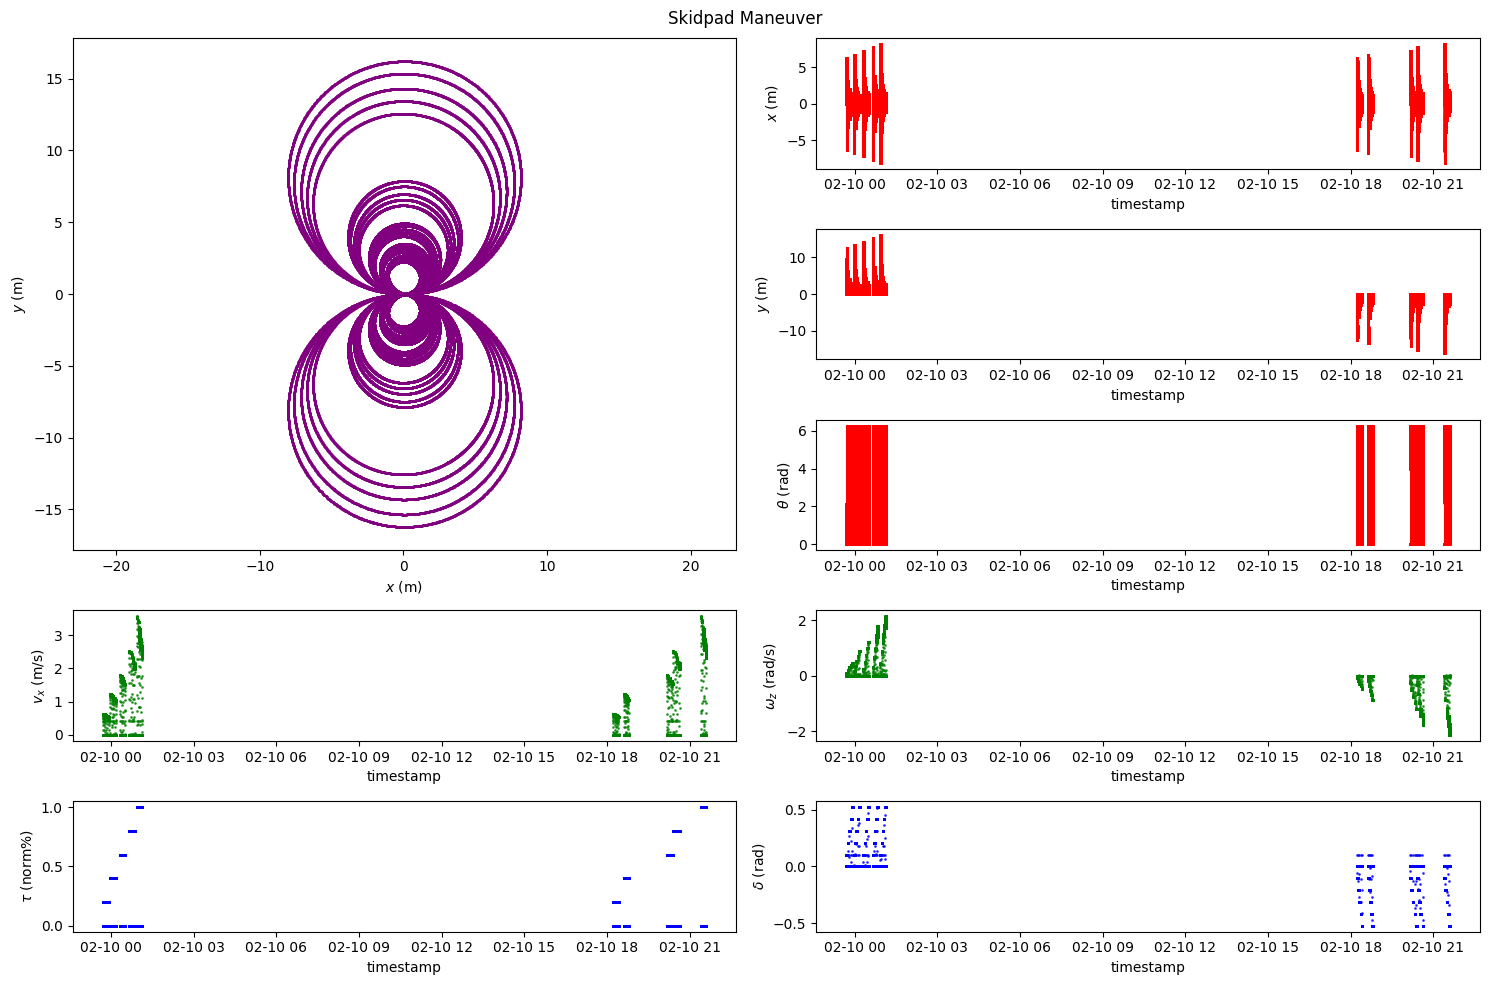

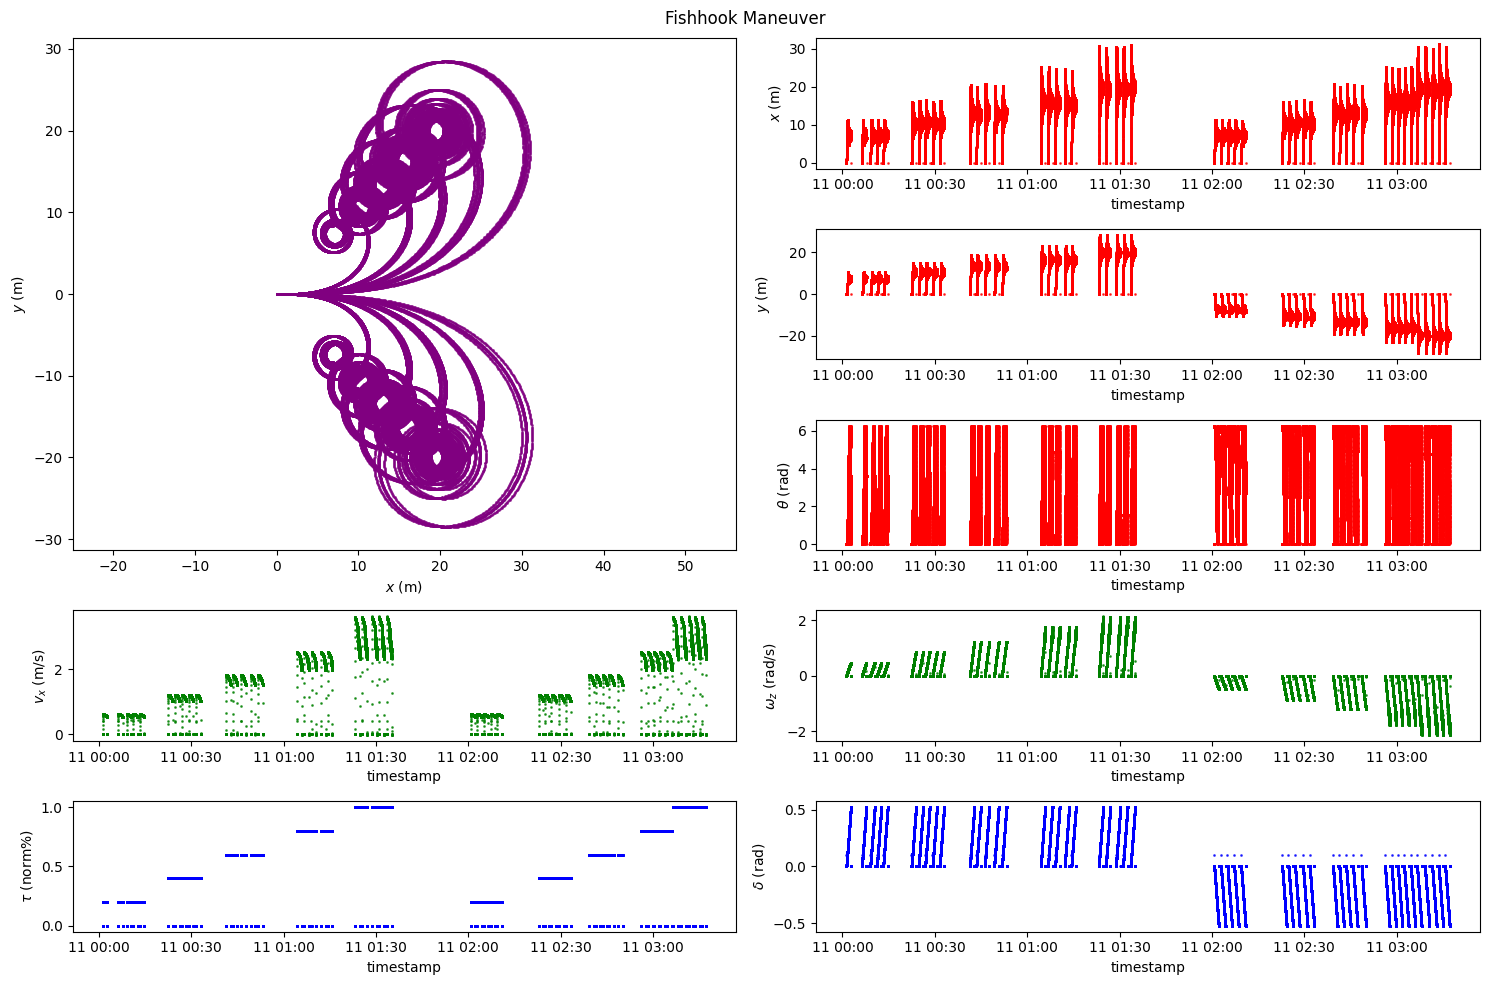

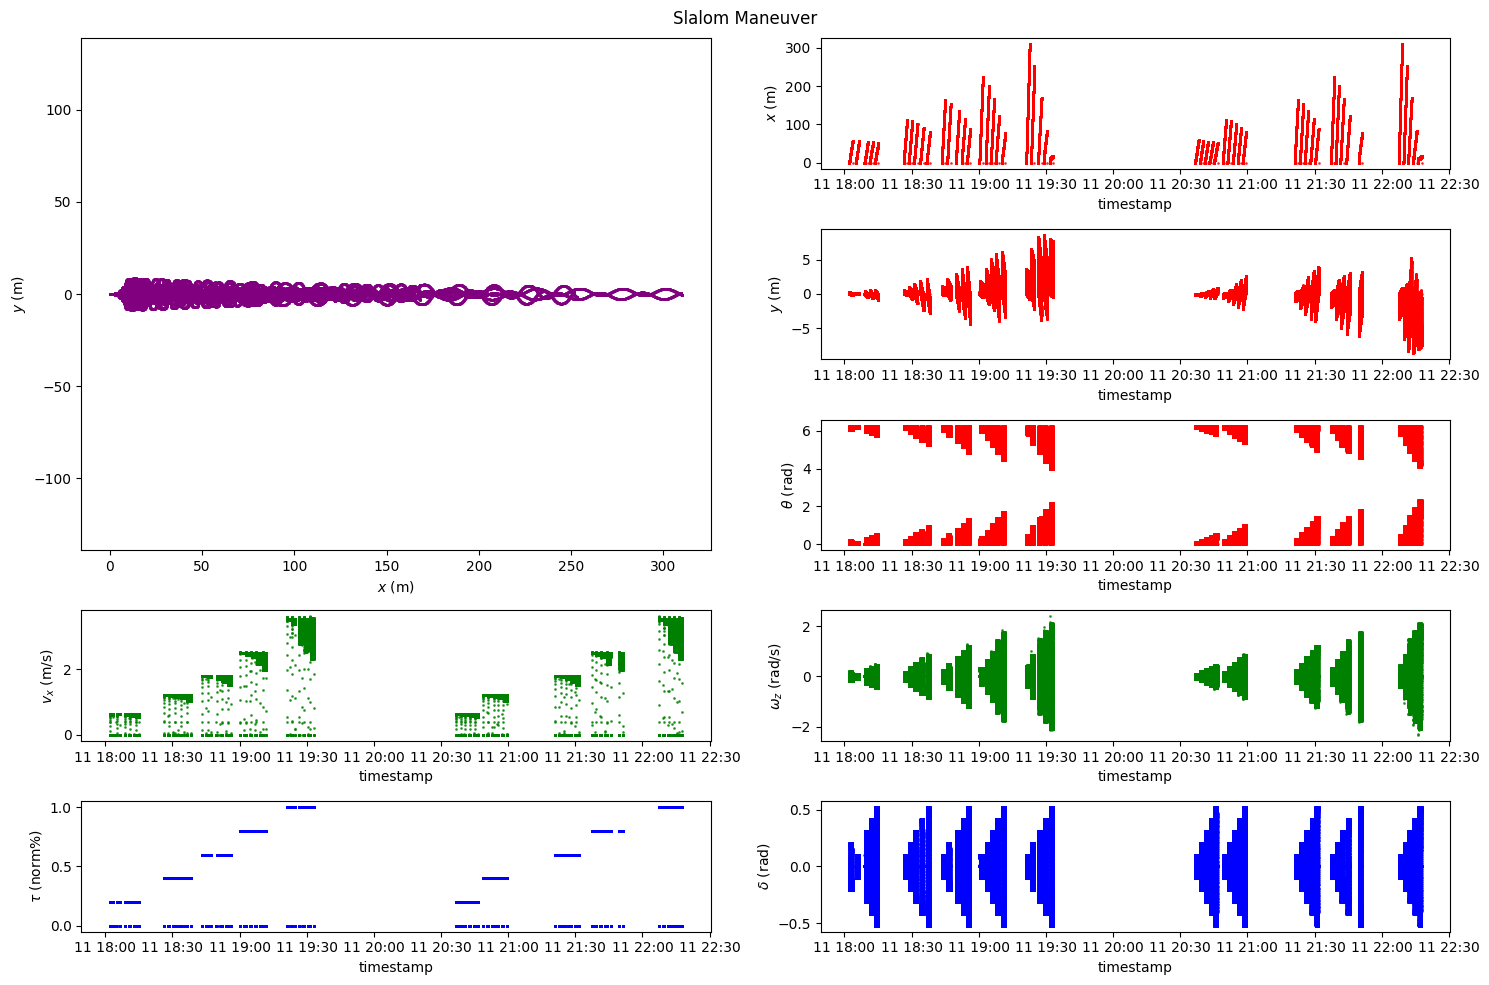

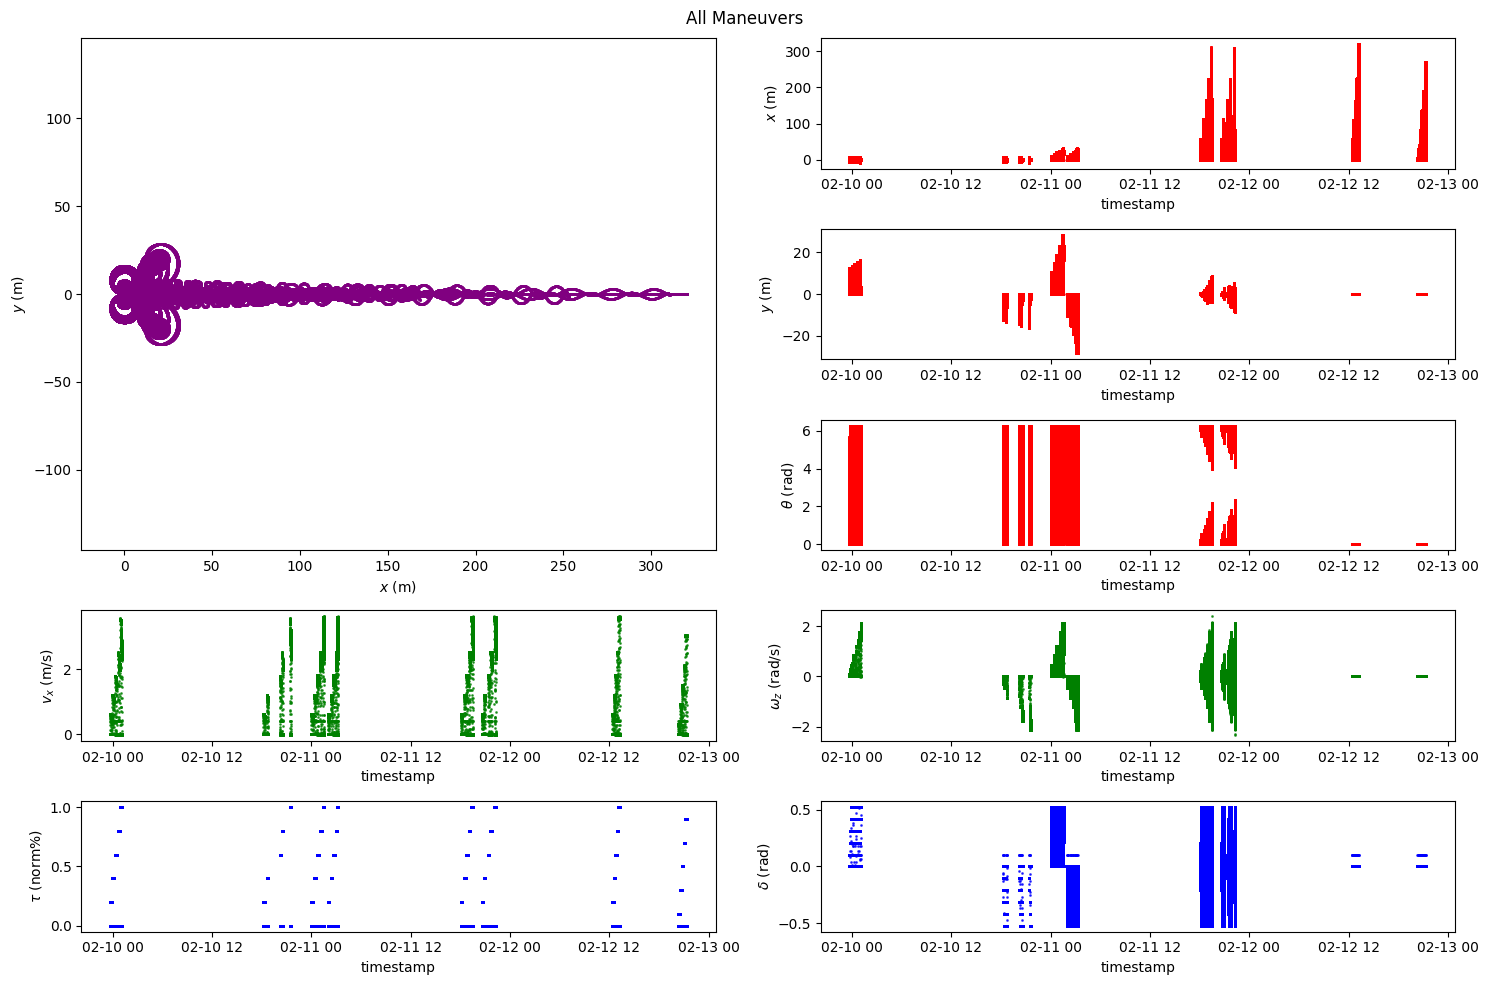

In [5]:
# Visualize the data

for log in [straight_log, skidpad_log, fishhook_log, slalom_log, all_log]:
    # Set figure size and sub-plot grid
    fig = plt.figure(figsize=(15, 10))
    if log is straight_log:
        fig.suptitle("Straight Maneuver")
    elif log is skidpad_log:
        fig.suptitle("Skidpad Maneuver")
    elif log is fishhook_log:
        fig.suptitle("Fishhook Maneuver")
    elif log is slalom_log:
        fig.suptitle("Slalom Maneuver")
    elif log is all_log:
        fig.suptitle("All Maneuvers")
    G = gridspec.GridSpec(5, 2)
    # Plot Y-position vs. X-position
    axes_1 = plt.subplot(G[0:3, 0])
    axes_1.scatter(np.asarray(log['posX']), np.asarray(log['posY']), s=1, color='purple', alpha=0.7)
    axes_1.axis('equal')
    axes_1.set_xlabel(r"$x$ (m)")
    axes_1.set_ylabel(r"$y$ (m)")
    # Plot X-position vs. elapsed time
    axes_2 = plt.subplot(G[0, 1])
    axes_2.scatter(np.asarray(log['timestamp']), np.asarray(log['posX']), s=1, color='red', alpha=0.7)
    axes_2.set_xlabel(r"timestamp")
    axes_2.set_ylabel(r"$x$ (m)")
    # Plot Y-position vs. elapsed time
    axes_3 = plt.subplot(G[1, 1])
    axes_3.scatter(np.asarray(log['timestamp']), np.asarray(log['posY']), s=1, color='red', alpha=0.7)
    axes_3.set_xlabel(r"timestamp")
    axes_3.set_ylabel(r"$y$ (m)")
    # Plot yaw vs. elapsed time
    axes_4 = plt.subplot(G[2, 1])
    axes_4.scatter(np.asarray(log['timestamp']), np.asarray(log['yaw']), s=1, color='red', alpha=0.7)
    axes_4.set_xlabel(r"timestamp")
    axes_4.set_ylabel(r"$\theta$ (rad)")
    # Plot speed vs. elapsed time
    axes_5 = plt.subplot(G[3, 0])
    axes_5.scatter(np.asarray(log['timestamp']), np.asarray(log['speed']), s=1, color='green', alpha=0.7)
    axes_5.set_xlabel(r"timestamp")
    axes_5.set_ylabel(r"$v_x$ (m/s)")
    # Plot yaw rate vs. elapsed time
    axes_6 = plt.subplot(G[3, 1])
    axes_6.scatter(np.asarray(log['timestamp']), np.asarray(log['angZ']), s=1, color='green', alpha=0.7)
    axes_6.set_xlabel(r"timestamp")
    axes_6.set_ylabel(r"$\omega_z$ (rad/s)")
    # Plot throttle vs. elapsed time
    axes_7 = plt.subplot(G[4, 0])
    axes_7.scatter(np.asarray(log['timestamp']), np.asarray(log['throttle']), s=1, color='blue', alpha=0.7)
    axes_7.set_xlabel(r"timestamp")
    axes_7.set_ylabel(r"$\tau$ (norm%)")
    # Plot steering angle vs. elapsed time
    axes_8 = plt.subplot(G[4, 1])
    axes_8.scatter(np.asarray(log['timestamp']), np.asarray(log['steering']), s=1, color='blue', alpha=0.7)
    axes_8.set_xlabel(r"timestamp")
    axes_8.set_ylabel(r"$\delta$ (rad)")
    # Show the plot
    plt.tight_layout()
    plt.show()